<a href="https://colab.research.google.com/github/shivckr/tutorials/blob/master/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
# load data
df =pd.read_csv( "https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv")
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
df.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [6]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [7]:
df[df.columns[df.dtypes== "object"]] 

,gender
0,F
1,M
2,F
3,M
4,F
...,...
15542,M
15543,F
15544,M
15545,F


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [24]:
#df['year'].value_counts().reset_index().sort_values(by = 'index', ascending = True)
series = df.groupby('year').sum('births').reset_index()
series.head()

,year,month,day,births
0,1969,4992,14280.0,3600206
1,1970,4992,14280.0,3737800
2,1971,4980,14159.0,3563548
3,1972,4982,14188.0,3266235
4,1973,4969,14096.0,3146125


In [27]:
tseries = df[['year','births']]
tseries.shape

(15547, 2)

Text(0, 0.5, 'births')

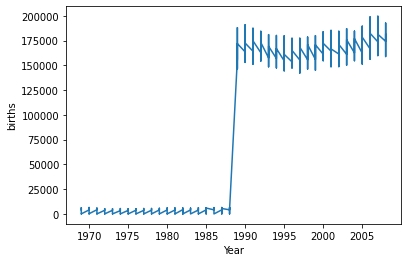

In [10]:
from matplotlib import pyplot as plt 
plt.plot(df[['year']],df[['births']])
plt.xlabel('Year')
plt.ylabel('births')

The data is  plotted as a time series with the year along the x-axis and birth figures on the y-axis.
We can see that the 'births' dataset has a clear trend.
This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

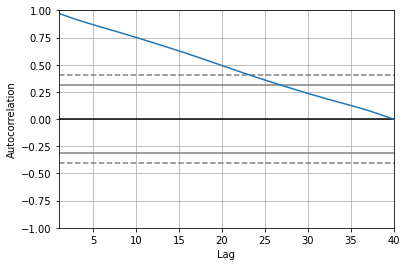

In [11]:
# auto_correlation plot 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

A good starting point for the AR(autoregression) parameter of the model may be 15.

Let’s start off with something simple. We will fit an ARIMA model to the entire year-birth and review the residual errors.

In [12]:
# install statsmodel in colab 
! pip install --upgrade git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-392ao0t7
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-392ao0t7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.13.0.dev0+203.gecd6ecaf0-cp36-cp36m-linux_x86_64.whl size=17979927 sha256=630aceb5a6a61ff43c8338be43a7716e261763c8b4e3b0d287182ba9f9134fb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-gl8mdtfp/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.13.0.dev0+203.gecd6ecaf0
    Uninstalling statsmodels-0.13.0.dev0+203.gecd6ecaf0:
      Successfully uninstalled statsmodels-0.13.0.dev0+203.gecd6ecaf0


First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

In [2]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
tseries.to_numpy().reshape(-1,1)


array([[  1969],
       [  4046],
       [  1969],
       ...,
       [173215],
       [  2008],
       [181235]])

In [37]:
tseries.shape

(15547, 2)

In [ ]:
# fit model 
#series.reset_index(drop = True)
model = ARIMA(tseries, order=(5,1,0))
model_fit = model.fit()

In [ ]:
# check anagram  string
from collections import Counter

def is_anagram(a,b):
  return Counter(a)==Counter(b)

s1 = 'cat'
s2 = 'act'
is_anagram(s1,s2)
